<a href="https://colab.research.google.com/github/LeoJua/AndresBarberShop/blob/main/bigdatafinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import csv
import re
import time
import string

In [ ]:
TextBlob('I love Javascript').sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [ ]:
TextBlob('I hate the spaghetti code').sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

In [ ]:
TextBlob('Odio el código spaguetti').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
TextBlob('Odio el código spaguetti').translate(from_lang='es', to='en').sentiment #fr, pt, it

Sentiment(polarity=-0.8, subjectivity=0.9)

In [188]:
df = pd.read_csv('Reviews.csv')
df.head(50)

,texto
0,I have bought several of the Vitality canned d...
1,If you are looking for the secret ingredient i...
2,Right now I'm mostly just sprouting this so my...
3,This is a very healthy dog food. Good for thei...
4,I love eating them and they are good for watch...
5,I am very satisfied with my Twizzler purchase....
6,Candy was delivered very fast and was purchase...
7,I can remember buying this candy as a kid and ...
8,I love this candy. After weight watchers I ha...
9,I was so glad Amazon carried these batteries. ...


In [61]:
def cleanTxt(text):
  text = re.sub(r'^RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  return text

In [155]:
df['cleanTxt'] = df['texto'].apply(cleanTxt)

In [156]:
 #crear una funcion para obtener la subjetividad
def getSubjectivity (text):
  return TextBlob(text). sentiment.subjectivity
#crear una funcion para obtener la polaridad
def getPolarity (text):
  return TextBlob(text). sentiment.polarity
#crear dos columnas 'Subjectivity' y 'Polarity'
df['Subjectivity'] = df['texto'].apply(getSubjectivity)
df['Polarity'] = df [ 'texto'].apply(getPolarity)
#mostrar el nuevo DataFrame con las dos nuevas columnas 'Subjectivity' y 'Polarity'
df

,texto,cleanTxt,Polarity,result,Subjectivity
0,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...,0.450000,1,0.433333
1,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...,0.166667,1,0.533333
2,Right now I'm mostly just sprouting this so my...,Right now I'm mostly just sprouting this so my...,0.428571,1,0.545238
3,This is a very healthy dog food. Good for thei...,This is a very healthy dog food. Good for thei...,0.450000,1,0.562500
4,I love eating them and they are good for watch...,I love eating them and they are good for watch...,0.506250,1,0.587500
5,I am very satisfied with my Twizzler purchase....,I am very satisfied with my Twizzler purchase....,0.412500,1,0.675000
6,Candy was delivered very fast and was purchase...,Candy was delivered very fast and was purchase...,0.240000,1,0.720000
7,I can remember buying this candy as a kid and ...,I can remember buying this candy as a kid and ...,0.125000,1,0.875000
8,I love this candy. After weight watchers I ha...,I love this candy. After weight watchers I ha...,0.250000,1,0.300000
9,I was so glad Amazon carried these batteries. ...,I was so glad Amazon carried these batteries. ...,0.145833,1,0.760417


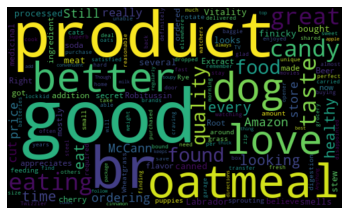

In [151]:

 #visualizacion de la nube de palabras
allWords = ''.join([twts for twts in df['texto']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis ('off')
plt.show()

In [162]:
 # Cree una función para calcular el análisis negativo (-1), neutral (0) y positivo (+1)
def getAnalysis (score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
#mostrar el dataFrame
df

,texto,cleanTxt,Polarity,result,Subjectivity,Analysis
0,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...,0.450000,1,0.433333,Positive
1,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...,0.166667,1,0.533333,Positive
2,Right now I'm mostly just sprouting this so my...,Right now I'm mostly just sprouting this so my...,0.428571,1,0.545238,Positive
3,This is a very healthy dog food. Good for thei...,This is a very healthy dog food. Good for thei...,0.450000,1,0.562500,Positive
4,I love eating them and they are good for watch...,I love eating them and they are good for watch...,0.506250,1,0.587500,Positive
5,I am very satisfied with my Twizzler purchase....,I am very satisfied with my Twizzler purchase....,0.412500,1,0.675000,Positive
6,Candy was delivered very fast and was purchase...,Candy was delivered very fast and was purchase...,0.240000,1,0.720000,Positive
7,I can remember buying this candy as a kid and ...,I can remember buying this candy as a kid and ...,0.125000,1,0.875000,Positive
8,I love this candy. After weight watchers I ha...,I love this candy. After weight watchers I ha...,0.250000,1,0.300000,Positive
9,I was so glad Amazon carried these batteries. ...,I was so glad Amazon carried these batteries. ...,0.145833,1,0.760417,Positive


In [171]:
 #imprimiendo tweets positivos
print('imprimiendo tweets positivos: \n')
j=1
sortedDF = df.sort_values (by=['Polarity']) # ordenar tweets
for i in range(0, sortedDF.shape [0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) +')'+ sortedDF[ 'texto'][1])
    print()
  j=j+1

imprimiendo tweets positivos: 

1)If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.;

2)If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.;

3)If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.;

4)If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.;

5)If you are looking for the secret ingredient in Robitussin I believe I

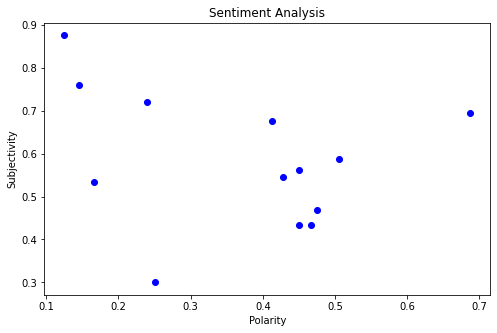

In [174]:
 #Plotting
plt.figure(figsize=(8,5))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df ["Subjectivity"][i], color='Blue')
#plt.scatter(x,y,color)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [178]:
 #imprimiendo el porcentaje de tweets positivos
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['texto']
ptweets
round( (ptweets.shape [0] / df.shape [0]) * 100, 1)

100.0

In [185]:
 #imprimiendo el porcentaje de tweets negativos
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['texto']
ntweets
round (ntweets.shape [0] / df.shape [0] * 100, 1)


0.0

In [186]:
 #mostrar el recuento de valores
df['Analysis'].value_counts()

Positive    13
Name: Analysis, dtype: int64

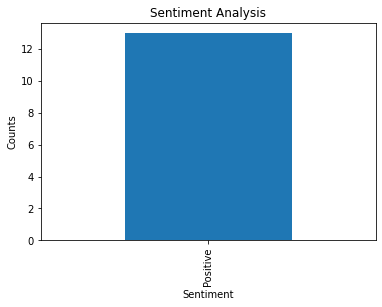

In [180]:
 #visualizar el conteo
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()
